# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "MONK3"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "_PL0.0")
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData016 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.016)
AnalyzedData017 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.017)
AnalyzedData018 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.018)
AnalyzedData019 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.019)


# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData011["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData016["Error_DUREAL"].shape[0],
                        AnalyzedData017["Error_DUREAL"].shape[0],
                        AnalyzedData018["Error_DUREAL"].shape[0],
                        AnalyzedData019["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData011["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0],
                         AnalyzedData016["Error_UNREAL"].shape[0],
                         AnalyzedData017["Error_DUREAL"].shape[0],
                         AnalyzedData018["Error_DUREAL"].shape[0],
                         AnalyzedData019["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
# ShapeTable.index = range(15,19,2)
ShapeTable.index = [11,15,16,17,18, 19]
ShapeTable

,DUREAL,UNREAL
11,99,100
15,100,100
16,99,100
17,100,100
18,100,100
19,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData011["Time_DUREAL"])/60,2)),
                            str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                            str(round(np.mean(AnalyzedData016["Time_DUREAL"])/60,2)),
                            str(round(np.mean(AnalyzedData017["Time_DUREAL"])/60,2)),
                            str(round(np.mean(AnalyzedData018["Time_DUREAL"])/60,2)),
                            str(round(np.mean(AnalyzedData019["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [
                  str(round(np.mean(AnalyzedData011["Time_UNREAL"])/60,2)),
                  str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)),
                  str(round(np.mean(AnalyzedData016["Time_UNREAL"])/60,2)),
                  str(round(np.mean(AnalyzedData017["Time_UNREAL"])/60,2)),
                  str(round(np.mean(AnalyzedData018["Time_UNREAL"])/60,2)),
                  str(round(np.mean(AnalyzedData019["Time_UNREAL"])/60,2))],
                "DUREAL max":[
                    str(round(np.max(AnalyzedData011["Time_DUREAL"])/60,2)),
                    str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                    str(round(np.max(AnalyzedData016["Time_DUREAL"])/60,2)),
                    str(round(np.max(AnalyzedData017["Time_DUREAL"])/60,2)),
                    str(round(np.max(AnalyzedData018["Time_DUREAL"])/60,2)),
                    str(round(np.max(AnalyzedData019["Time_DUREAL"])/60,2))],
              "UNREAL max": [
                  str(round(np.max(AnalyzedData011["Time_UNREAL"])/60,2)),
                  str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)),
                  str(round(np.max(AnalyzedData016["Time_UNREAL"])/60,2)),
                  str(round(np.max(AnalyzedData017["Time_UNREAL"])/60,2)),
                  str(round(np.max(AnalyzedData018["Time_UNREAL"])/60,2)),
                  str(round(np.max(AnalyzedData019["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = [11,15,16,17,18, 19]
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
11,21.08,20.21,67.78,69.83
15,46.65,39.58,170.56,109.17
16,90.51,80.42,441.89,324.5
17,75.71,67.95,306.79,299.59
18,163.9,138.66,912.11,785.18
19,132.66,131.86,584.28,1127.61


In [5]:
1127./60

18.783333333333335

# Error Vec

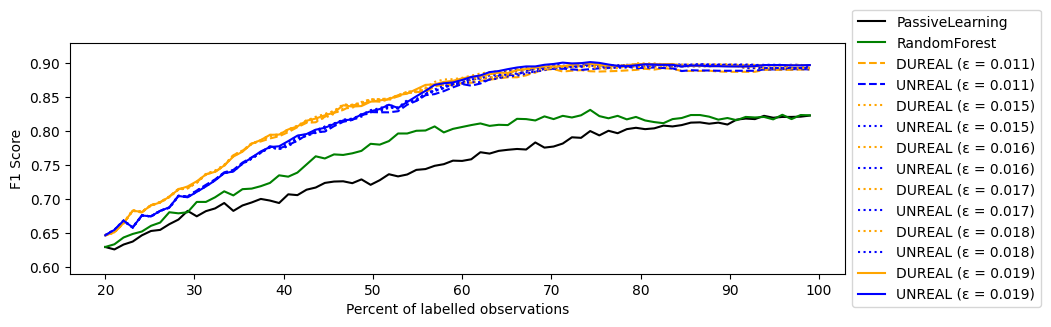

In [6]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL011": "orange",
    "UNREAL011": "blue",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL016": "orange",
    "UNREAL016": "blue",
    "DUREAL017": "orange",
    "UNREAL017": "blue",
    "DUREAL018": "orange",
    "UNREAL018": "blue",
    "DUREAL019": "orange",
    "UNREAL019": "blue",

}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL011": "dashed",
    "UNREAL011": "dashed",
    "DUREAL015": "dotted",
    "UNREAL015": "dotted",
    "DUREAL016": "dotted",
    "UNREAL016": "dotted",
    "DUREAL017": "dotted",
    "UNREAL017": "dotted",
    "DUREAL018": "dotted",
    "UNREAL018": "dotted",
    "UNREAL019": "solid",
    "DUREAL019": "solid"

}

LegendMapping = {
    "DUREAL011": "DUREAL (ε = 0.011)",
    "UNREAL011": "UNREAL (ε = 0.011)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL016": "DUREAL (ε = 0.016)",
    "UNREAL016": "UNREAL (ε = 0.016)",
    "DUREAL017": "DUREAL (ε = 0.017)",
    "UNREAL017": "UNREAL (ε = 0.017)",
    "DUREAL018": "DUREAL (ε = 0.018)",
    "UNREAL018": "UNREAL (ε = 0.018)",
    "UNREAL019": "UNREAL (ε = 0.019)",
    "DUREAL019": "DUREAL (ε = 0.019)"

}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                PassiveLearning = PassiveLearningRF["Error_RF"],
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL011 = AnalyzedData011["Error_DUREAL"],
                 UNREAL011 = AnalyzedData011["Error_UNREAL"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL016 = AnalyzedData016["Error_DUREAL"],
                 UNREAL016 = AnalyzedData016["Error_UNREAL"],
                 DUREAL017 = AnalyzedData017["Error_DUREAL"],
                 UNREAL017 = AnalyzedData017["Error_UNREAL"],
                 DUREAL018 = AnalyzedData018["Error_DUREAL"],
                 UNREAL018 = AnalyzedData018["Error_UNREAL"],
                 DUREAL019 = AnalyzedData019["Error_DUREAL"],
                 UNREAL019 = AnalyzedData019["Error_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 FigSize = (10,3),
                 VarInput = False,
                 CriticalValue = 1.96)

# Wilcoxon Ranked Signed Test

In [7]:
# WRSTResults = WilcoxonRankSignedTest({"PassiveLearning" : PassiveLearningRF["Error_RF"],
#                  "RandomForest" : RandomForesResults["Error_RF"],
#                  "DUREAL011" : AnalyzedData011["Error_DUREAL"],
#                  "UNREAL011" : AnalyzedData011["Error_UNREAL"],
#                  "DUREAL015" : AnalyzedData015["Error_DUREAL"],
#                  "UNREAL015" : AnalyzedData015["Error_UNREAL"],
#                  "DUREAL016" : AnalyzedData016["Error_DUREAL"],
#                  "UNREAL016" : AnalyzedData016["Error_UNREAL"],
#                  "DUREAL017" : AnalyzedData017["Error_DUREAL"],
#                  "UNREAL017" : AnalyzedData017["Error_UNREAL"],
#                  "DUREAL018" : AnalyzedData018["Error_DUREAL"],
#                  "UNREAL018" : AnalyzedData017["Error_UNREAL"],
#                  "DUREAL019" : AnalyzedData018["Error_DUREAL"],
#                  "UNREAL019" : AnalyzedData018["Error_UNREAL"]},
#                  RoundingVal=5)

# WRSTResults_LatexTable = WRSTResults.to_latex()
# print(WRSTResults_LatexTable)

# Input

In [8]:
AnalyzedDataSmall = AnalyzedData011
AnalyzedDataLarge = AnalyzedData019

# Selection History

In [9]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
17,21.475410,True,True,False,False,True,True,True,False,False,False,True,True
69,22.555556,True,False,True,False,True,False,True,False,False,True,False,False
95,23.156250,True,False,False,True,False,False,False,True,False,False,True,False
28,23.593220,False,True,False,False,True,False,True,False,False,False,False,False
90,24.193548,True,False,False,True,False,True,True,False,False,False,True,True


# Tree Counts

In [10]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

# Number of All Trees

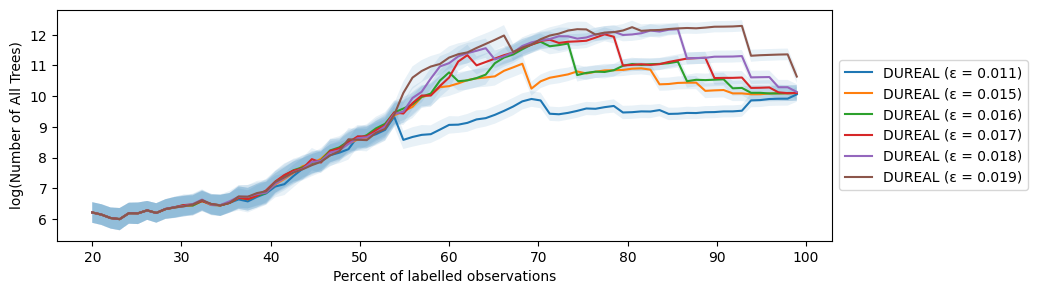

In [11]:
### Line Styles ###
linestyles = {"DUREAL005" : "solid",
"DUREAL011" : "solid",
"DUREAL015" : "solid",
"DUREAL016" : "solid",
"DUREAL017" : "solid",
"DUREAL018" : "solid",
"DUREAL019" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL011 = np.log(AnalyzedData011["TreeCounts_ALL_UNREAL"]),
                 DUREAL015 = np.log(AnalyzedData015["TreeCounts_ALL_UNREAL"]),
                 DUREAL016 = np.log(AnalyzedData016["TreeCounts_ALL_UNREAL"]),
                 DUREAL017 = np.log(AnalyzedData017["TreeCounts_ALL_UNREAL"]),
                 DUREAL018 = np.log(AnalyzedData018["TreeCounts_ALL_UNREAL"]),
                 DUREAL019 = np.log(AnalyzedData019["TreeCounts_ALL_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of All Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 VarInput = False,
                 CriticalValue = 1.96)

## Number of Unique Trees

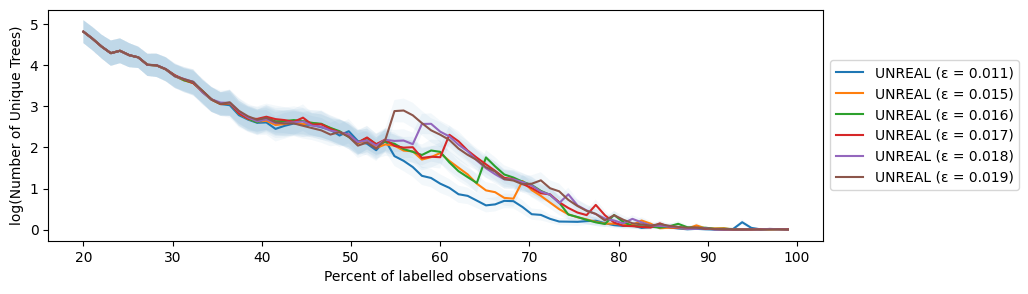

In [12]:
### Linetype ###
linestyles = {"UNREAL005" : "solid",
"UNREAL011" : "solid",
"UNREAL015" : "solid",
"UNREAL016" : "solid",
"UNREAL017" : "solid",
"UNREAL018" : "solid",
"UNREAL019" : "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 UNREAL011 = np.log(AnalyzedData011["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL015 = np.log(AnalyzedData015["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL016 = np.log(AnalyzedData016["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL017 = np.log(AnalyzedData017["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL018 = np.log(AnalyzedData018["TreeCounts_UNIQUE_UNREAL"]),
                 UNREAL019 = np.log(AnalyzedData019["TreeCounts_UNIQUE_UNREAL"]),
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "log(Number of Unique Trees)",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 VarInput = False,
                 CriticalValue = 1.96)